In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '20b4c099-062c-4bc6-84e5-391674af77cc',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-08-01T13:46:07.039Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9873}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10380, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
import pandas as pd

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\Dell\AppData\Local\Temp\ipykernel_3500\644439384.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10380,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.944499e+07,1.944499e+07,False,NaN,1,NaN,NaN,None,2023-08-01T13:44:00.000Z,28867.380999,1.397086e+10,23.6865,-0.035525,-1.801426,-1.488716,-5.414459,6.521167,1.815527,5.613260e+11,48.2155,6.062150e+11,None,2023-08-01T13:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-01 13:46:19.734642
1,1027,Ethereum,ETH,ethereum,7201,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201758e+08,1.201758e+08,True,NaN,2,NaN,NaN,None,2023-08-01T13:44:00.000Z,1832.801952,5.877759e+09,19.8968,0.022352,-1.837544,-1.739583,-4.349131,-3.099696,-1.267080,2.202585e+11,18.9193,2.202585e+11,None,2023-08-01T13:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-01 13:46:19.734642
2,825,Tether USDt,USDT,tether,58267,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.381925e+10,8.670626e+10,True,NaN,3,NaN,NaN,None,2023-08-01T13:44:00.000Z,0.999587,2.292178e+10,22.4037,0.010674,-0.042702,-0.015837,-0.044291,-0.068481,-0.090590,8.378466e+10,7.1970,8.667048e+10,None,2023-08-01T13:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-01 13:46:19.734642
3,1839,BNB,BNB,bnb,1551,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538552e+08,1.538552e+08,False,NaN,4,NaN,NaN,None,2023-08-01T13:44:00.000Z,245.143034,7.447075e+08,-51.8226,0.030109,0.689212,3.405443,0.161106,-20.053822,-24.085321,3.771652e+10,3.2398,3.771652e+10,None,2023-08-01T13:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-01 13:46:19.734642
4,52,XRP,XRP,xrp,1017,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.269385e+10,9.998856e+10,False,NaN,5,NaN,NaN,None,2023-08-01T13:44:00.000Z,0.690256,1.678895e+09,31.2207,0.233397,-1.995119,-1.684315,43.435342,33.894830,52.250412,3.637227e+10,3.1240,6.902565e+10,None,2023-08-01T13:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-01 13:46:19.734642
5,3408,USD Coin,USDC,usd-coin,13507,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.644111e+10,2.644111e+10,False,NaN,6,NaN,NaN,None,2023-08-01T13:44:00.000Z,0.999998,3.490453e+09,29.1657,0.007066,-0.014371,0.001915,-0.012781,0.002979,-0.003465,2.644104e+10,2.2710,2.644104e+10,None,2023-08-01T13:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-01 13:46:19.734642
6,74,Dogecoin,DOGE,dogecoin,760,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.404118e+11,1.404118e+11,True,NaN,7,NaN,NaN,None,2023-08-01T13:44:00.000Z,0.077042,4.013874e+08,1.2128,-0.047031,-2.637725,0.334089,14.953567,7.039158,-1.039465,1.081766e+10,0.9291,1.081766e+10,None,2023-08-01T13:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-01 13:46:19.734642
7,2010,Cardano,ADA,cardano,886,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.500968e+10,3.603028e+10,False,NaN,8,NaN,NaN,None,2023-08-01T13:44:00.000Z,0.304844,2.549606e+08,37.5445,-0.142426,-2.633574,0.071555,5.339631,-18.844247,-20.149114,1.067248e+10,0.9167,1.371796e+10,None,2023-08-01T13:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-01 13:46:19.734642
8,5426,Solana,SOL,solana,496,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '20b4c099-062c-4bc6-84e5-391674af77cc',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

In [6]:
import os
from time import time
from time import sleep
for i in range(333):
        api_runner()
        print('API Runner completed')
        sleep(60)
exit()

{'status': {'timestamp': '2023-08-01T13:46:49.164Z', 'error_code': 0, 'error_message': None, 'elapsed': 461, 'credit_count': 1, 'notice': None, 'total_count': 9873}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10380, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

C:\Users\Dell\AppData\Local\Temp\ipykernel_3500\583555961.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\Dell\AppData\Local\Temp\ipykernel_3500\583555961.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


{'status': {'timestamp': '2023-08-01T13:47:50.277Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 9873}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10380, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\Dell\AppData\Local\Temp\ipykernel_3500\583555961.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\Dell\AppData\Local\Temp\ipykernel_3500\583555961.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


{'status': {'timestamp': '2023-08-01T13:48:50.876Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 9873}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10380, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\Dell\AppData\Local\Temp\ipykernel_3500\583555961.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\Dell\AppData\Local\Temp\ipykernel_3500\583555961.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


{'status': {'timestamp': '2023-08-01T13:49:51.834Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9873}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10380, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\Dell\AppData\Local\Temp\ipykernel_3500\583555961.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\Dell\AppData\Local\Temp\ipykernel_3500\583555961.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


{'status': {'timestamp': '2023-08-01T13:50:52.698Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9873}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10380, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\Dell\AppData\Local\Temp\ipykernel_3500\583555961.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\Dell\AppData\Local\Temp\ipykernel_3500\583555961.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


KeyboardInterrupt: 

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10380,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.944499e+07,1.944499e+07,False,NaN,1,NaN,NaN,None,2023-08-01T13:44:00.000Z,28867.380999,1.397086e+10,23.6865,-0.035525,-1.801426,-1.488716,-5.414459,6.521167,1.815527,5.613260e+11,48.2155,6.062150e+11,None,2023-08-01T13:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-01 13:46:19.734642
1,1027,Ethereum,ETH,ethereum,7201,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201758e+08,1.201758e+08,True,NaN,2,NaN,NaN,None,2023-08-01T13:44:00.000Z,1832.801952,5.877759e+09,19.8968,0.022352,-1.837544,-1.739583,-4.349131,-3.099696,-1.267080,2.202585e+11,18.9193,2.202585e+11,None,2023-08-01T13:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-01 13:46:19.734642
2,825,Tether USDt,USDT,tether,58267,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.381925e+10,8.670626e+10,True,NaN,3,NaN,NaN,None,2023-08-01T13:44:00.000Z,0.999587,2.292178e+10,22.4037,0.010674,-0.042702,-0.015837,-0.044291,-0.068481,-0.090590,8.378466e+10,7.1970,8.667048e+10,None,2023-08-01T13:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-01 13:46:19.734642
3,1839,BNB,BNB,bnb,1551,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538552e+08,1.538552e+08,False,NaN,4,NaN,NaN,None,2023-08-01T13:44:00.000Z,245.143034,7.447075e+08,-51.8226,0.030109,0.689212,3.405443,0.161106,-20.053822,-24.085321,3.771652e+10,3.2398,3.771652e+10,None,2023-08-01T13:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-01 13:46:19.734642
4,52,XRP,XRP,xrp,1017,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.269385e+10,9.998856e+10,False,NaN,5,NaN,NaN,None,2023-08-01T13:44:00.000Z,0.690256,1.678895e+09,31.2207,0.233397,-1.995119,-1.684315,43.435342,33.894830,52.250412,3.637227e+10,3.1240,6.902565e+10,None,2023-08-01T13:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-01 13:46:19.734642
5,3408,USD Coin,USDC,usd-coin,13507,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.644111e+10,2.644111e+10,False,NaN,6,NaN,NaN,None,2023-08-01T13:44:00.000Z,0.999998,3.490453e+09,29.1657,0.007066,-0.014371,0.001915,-0.012781,0.002979,-0.003465,2.644104e+10,2.2710,2.644104e+10,None,2023-08-01T13:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-01 13:46:19.734642
6,74,Dogecoin,DOGE,dogecoin,760,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.404118e+11,1.404118e+11,True,NaN,7,NaN,NaN,None,2023-08-01T13:44:00.000Z,0.077042,4.013874e+08,1.2128,-0.047031,-2.637725,0.334089,14.953567,7.039158,-1.039465,1.081766e+10,0.9291,1.081766e+10,None,2023-08-01T13:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-01 13:46:19.734642
7,2010,Cardano,ADA,cardano,886,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.500968e+10,3.603028e+10,False,NaN,8,NaN,NaN,None,2023-08-01T13:44:00.000Z,0.304844,2.549606e+08,37.5445,-0.142426,-2.633574,0.071555,5.339631,-18.844247,-20.149114,1.067248e+10,0.9167,1.371796e+10,None,2023-08-01T13:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-01 13:46:19.734642
8,5426,Solana,SOL,solana,496,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,

In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10380,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19444993.00000,19444993.00000,False,NaN,1,NaN,NaN,None,2023-08-01T13:44:00.000Z,28867.38100,13970859847.64277,23.68650,-0.03553,-1.80143,-1.48872,-5.41446,6.52117,1.81553,561326021445.32910,48.21550,606215000969.76001,None,2023-08-01T13:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-01 13:46:19.734642
1,1027,Ethereum,ETH,ethereum,7201,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120175839.62777,120175839.62777,True,NaN,2,NaN,NaN,None,2023-08-01T13:44:00.000Z,1832.80195,5877758566.47713,19.89680,0.02235,-1.83754,-1.73958,-4.34913,-3.09970,-1.26708,220258513433.10886,18.91930,220258513433.10999,None,2023-08-01T13:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-01 13:46:19.734642
2,825,Tether USDt,USDT,tether,58267,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83819250310.67526,86706257841.30522,True,NaN,3,NaN,NaN,None,2023-08-01T13:44:00.000Z,0.99959,22921783317.48459,22.40370,0.01067,-0.04270,-0.01584,-0.04429,-0.06848,-0.09059,83784659943.99220,7.19700,86670476069.92000,None,2023-08-01T13:44:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-01 13:46:19.734642
3,1839,BNB,BNB,bnb,1551,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153855174.86000,153855174.86000,False,NaN,4,NaN,NaN,None,2023-08-01T13:44:00.000Z,245.14303,744707530.40205,-51.82260,0.03011,0.68921,3.40544,0.16111,-20.05382,-24.08532,37716524331.43150,3.23980,37716524331.43000,None,2023-08-01T13:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-01 13:46:19.734642
4,52,XRP,XRP,xrp,1017,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52693851493.00000,99988556423.00000,False,NaN,5,NaN,NaN,None,2023-08-01T13:44:00.000Z,0.69026,1678894717.28609,31.22070,0.23340,-1.99512,-1.68432,43.43534,33.89483,52.25041,36372270944.50575,3.12400,69025645144.46001,None,2023-08-01T13:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-01 13:46:19.734642
5,3408,USD Coin,USDC,usd-coin,13507,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,26441106449.23304,26441106449.23304,False,NaN,6,NaN,NaN,None,2023-08-01T13:44:00.000Z,1.00000,3490452592.24636,29.16570,0.00707,-0.01437,0.00191,-0.01278,0.00298,-0.00347,26441043056.05883,2.27100,26441043056.06000,None,2023-08-01T13:44:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-01 13:46:19.734642
6,74,Dogecoin,DOGE,dogecoin,760,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140411836383.70526,140411836383.70526,True,NaN,7,NaN,NaN,None,2023-08-01T13:44:00.000Z,0.07704,401387401.87745,1.21280,-0.04703,-2.63772,0.33409,14.95357,7.03916,-1.03946,10817660954.02866,0.92910,10817660954.03000,None,2023-08-01T13:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-01 13:46:19.734642
7,2010,Cardano,ADA,cardano,886,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35009676890.77700,36030277985.67100,False,NaN,8,NaN,NaN,None,2023-08-01T13:44:00.000Z,0.30484,254960553.71515,37.54450,-0.14243,-2.63357,0.07155,5.33963,-18.84425,-20.14911,10672475698.70817,0.91670,13717961692.14000,None,2023-08-01T13:44:0

In [11]:
df3= df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.04914,-1.85071,-1.40102,-5.41515,6.80625,1.86479
Ethereum,0.01412,-1.87943,-1.70546,-4.37298,-2.87827,-1.22681
Tether USDt,-0.00717,-0.03144,-0.02096,-0.03162,-0.07834,-0.08353
BNB,0.05133,0.67509,3.33147,0.05099,-19.98985,-24.09158
XRP,0.22457,-2.00838,-1.64503,43.41672,33.90135,52.24624
USD Coin,-0.00108,-0.00454,-0.00250,0.00543,-0.00581,-0.00142
Dogecoin,-0.05628,-2.56994,0.36840,14.97081,7.11723,-0.99833
Cardano,-0.11530,-2.62329,-0.03698,5.34534,-18.79021,-20.13212
Solana,-0.15430,-4.47913,0.07401,23.51915,10.67729,8.97863


In [12]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.04914
              quote.USD.percent_change_24h    -1.85071
              quote.USD.percent_change_7d     -1.40102
              quote.USD.percent_change_30d    -5.41515
              quote.USD.percent_change_60d     6.80625
              quote.USD.percent_change_90d     1.86479
Ethereum      quote.USD.percent_change_1h      0.01412
              quote.USD.percent_change_24h    -1.87943
              quote.USD.percent_change_7d     -1.70546
              quote.USD.percent_change_30d    -4.37298
              quote.USD.percent_change_60d    -2.87827
              quote.USD.percent_change_90d    -1.22681
Tether USDt   quote.USD.percent_change_1h     -0.00717
              quote.USD.percent_change_24h    -0.03144
              quote.USD.percent_change_7d     -0.02096
              quote.USD.percent_change_30d    -0.03162
              quote.USD.percent_change_60d    -0.07834
              quote.US

In [13]:
df5 = df4.to_frame(name= 'Values')
df5

Values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.04914
             quote.USD.percent_change_24h  -1.85071
             quote.USD.percent_change_7d   -1.40102
             quote.USD.percent_change_30d  -5.41515
             quote.USD.percent_change_60d   6.80625
             quote.USD.percent_change_90d   1.86479
Ethereum     quote.USD.percent_change_1h    0.01412
             quote.USD.percent_change_24h  -1.87943
             quote.USD.percent_change_7d   -1.70546
             quote.USD.percent_change_30d  -4.37298
             quote.USD.percent_change_60d  -2.87827
             quote.USD.percent_change_90d  -1.22681
Tether USDt  quote.USD.percent_change_1h   -0.00717
             quote.USD.percent_change_24h  -0.03144
             quote.USD.percent_change_7d   -0.02096
             quote.USD.percent_change_30d  -0.03162
             quote.USD.percent_change_60d  -0.07834
             quote.USD.percent_change_90d  -0.08353
BNB          quote.USD.percent_change_1h    0.05133
             quote.USD.percent_change_24h   0.67509
             quote.USD.percent_change_7d    3.33147
             quote.USD.percent_change_30d   0.05099
             quote.USD.percent_change_60d -19.98985
             quote.USD.percent_change_90d -24.09158
XRP          quote.USD.percent_change_1h    0.22457
             quote.USD.percent_change_24h  -2.00838
             quote.USD.percent_change_7d   -1.64503
             quote.USD.percent_change_30d  43.41672
             quote.USD.percent_change_60d  33.90135
             quote.USD.percent_change_90d  52.24624
USD Coin     quote.USD.percent_change_1h   -0.00108
             quote.USD.percent_change_24h  -0.00454
             quote.USD.percent_change_7d   -0.00250
             quote.USD.percent_change_30d   0.00543
             quote.USD.percent_change_60d  -0.00581
             quote.USD.percent_change_90d  -0.00142
Dogecoin     quote.USD.percent_change_1h   -0.05628
             quote.USD.percent_change_24h  -2.56994
             quote.USD.percent_change_7d    0.36840
             quote.USD.percent_change_30d  14.97081
             quote.USD.percent_change_60d   7.11723
             quote.USD.percent_change_90d  -0.99833
Cardano      quote.USD.percent_change_1h   -0.11530
             quote.USD.percent_change_24h  -2.62329
             quote.USD.percent_change_7d   -0.03698
             quote.USD.percent_change_30d   5.34534
             quote.USD.percent_change_60d -18.79021
             quote.USD.percent_change_90d -20.13212
Solana       quote.USD.percent_change_1h   -0.15430
             quote.USD.percent_change_24h  -4.47913
             quote.USD.percent_change_7d    0.07401
             quote.USD.percent_change_30d  23.51915
             quote.USD.percent_change_60d  10.67729
             quote.USD.percent_change_90d   8.97863
TRON         quote.USD.percent_change_1h   -0.05493
             quote.USD.percent_change_24h   0.43312
             quote.USD.percent_change_7d   -3.95164
             quote.USD.percent_change_30d   3.38628
             quote.USD.percent_change_60d   2.11714
             quote.USD.percent_change_90d  13.08174
Litecoin     quote.USD.percent_change_1h    0.27804
             quote.USD.percent_change_24h  -2.20285
             quote.USD.percent_change_7d    1.59677
             quote.USD.percent_change_30d -18.12769
             quote.USD.percent_change_60d  -3.23252
             quote.USD.percent_change_90d   5.65091
Polygon      quote.USD.percent_change_1h   -0.06516
             quote.USD.percent_change_24h  -2.60282
             quote.USD.percent_change_7d   -5.11318
             quote.USD.percent_change_30d   2.10265
             quote.USD.percent_change_60d -24.36880
             quote.USD.percent_change_90d -30.68280
Polkadot     quote.USD.percent_change_1h    0.02180
             quote.USD.percent_change_24h  -1.27770
             quote.USD.percent_change_7d   -1.34947
             quote.USD.percent_change_30d

In [16]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.04914
1,Bitcoin,quote.USD.percent_change_24h,-1.85071
2,Bitcoin,quote.USD.percent_change_7d,-1.40102
3,Bitcoin,quote.USD.percent_change_30d,-5.41515
4,Bitcoin,quote.USD.percent_change_60d,6.80625
5,Bitcoin,quote.USD.percent_change_90d,1.86479
6,Ethereum,quote.USD.percent_change_1h,0.01412
7,Ethereum,quote.USD.percent_change_24h,-1.87943
8,Ethereum,quote.USD.percent_change_7d,-1.70546
9,Ethereum,quote.USD.percent_change_30d,-4.37298


In [23]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,Values
0,Bitcoin,1h,-0.04914
1,Bitcoin,24h,-1.85071
2,Bitcoin,7d,-1.40102
3,Bitcoin,30d,-5.41515
4,Bitcoin,60d,6.80625
5,Bitcoin,90d,1.86479
6,Ethereum,1h,0.01412
7,Ethereum,24h,-1.87943
8,Ethereum,7d,-1.70546
9,Ethereum,30d,-4.37298


In [17]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.04914
1,Bitcoin,quote.USD.percent_change_24h,-1.85071
2,Bitcoin,quote.USD.percent_change_7d,-1.40102
3,Bitcoin,quote.USD.percent_change_30d,-5.41515
4,Bitcoin,quote.USD.percent_change_60d,6.80625
5,Bitcoin,quote.USD.percent_change_90d,1.86479
6,Ethereum,quote.USD.percent_change_1h,0.01412
7,Ethereum,quote.USD.percent_change_24h,-1.87943
8,Ethereum,quote.USD.percent_change_7d,-1.70546
9,Ethereum,quote.USD.percent_change_30d,-4.37298


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

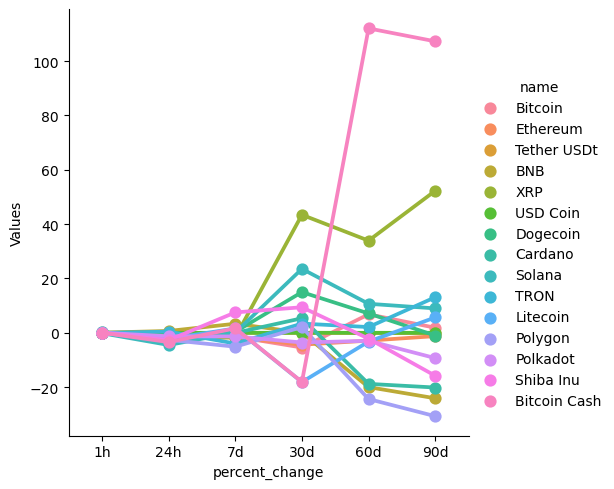

In [24]:
sns.catplot(x = 'percent_change', y = 'Values', hue = 'name', data = df7, kind = 'point')

In [25]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,28867.38100,2023-08-01 13:46:19.734642
0,Bitcoin,28860.17452,2023-08-01 13:46:49.745418
0,Bitcoin,28860.16371,2023-08-01 13:47:50.859239
0,Bitcoin,28863.35245,2023-08-01 13:48:51.466194
0,Bitcoin,28866.73341,2023-08-01 13:49:52.418077
0,Bitcoin,28866.61218,2023-08-01 13:50:53.266422


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

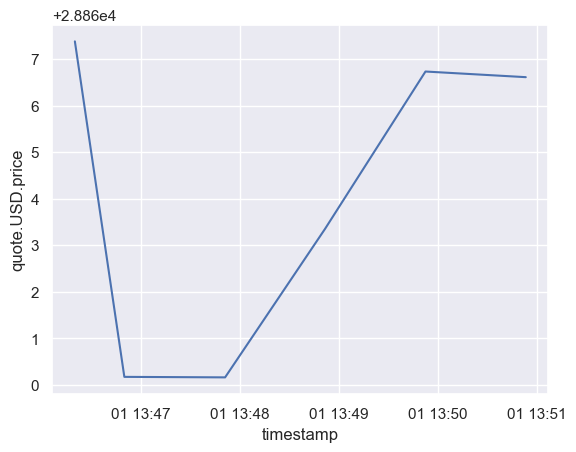

In [26]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)